Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer_16 (InputLayer) │ (None, 1)             │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_73 (Dense)            │ (None, 8)             │         16 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_74 (Dense)            │ (None, 16)            │        144 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_75 (Dense)            │ (None, 32)            │        544 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_76 (Dense)            │ (None, 8)             │        264 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_77 (Dense)            │ (None, 1)             │          9 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 977 (3.82 KB)

 Trainable params: 977 (3.82 KB)

 Non-trainable params: 0 (0.00 B)

(10000,) 10000
total_n: 10000, train_n: 7000, val_n: 1000, test_n: 2000
Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 51384.1055 - mae: 163.4204 - val_loss: 7919.3433 - val_mae: 68.2455
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4805.1016 - mae: 59.7930 - val_loss: 3357.3811 - val_mae: 51.4573
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3063.7473 - mae: 49.0037 - val_loss: 2383.5725 - val_mae: 41.8047
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2070.6345 - mae: 38.5249 - val_loss: 1360.5953 - val_mae: 30.4969
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1130.0461 - mae: 26.8358 - val_loss: 624.7333 - val_mae: 19.5846
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 501.0112 - mae: 17.0248 - val_loss: 261.3092 - val_mae: 10.9827
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 202.2317 - mae: 9.7021 - val_loss: 111.5462 - val_mae: 7.5777
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

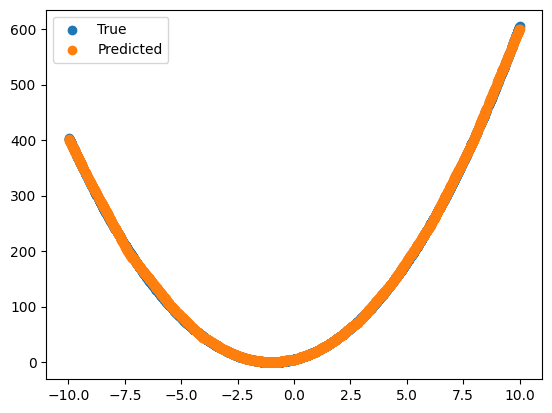

In [ ]:
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt


def build_model():
  inputs = Input((1,))
  h0 = Dense(8, activation='relu')(inputs)
  h1 = Dense(16, activation='relu')()
  h2 = Dense(32, activation='relu')(h1)
  h3 = Dense(8, activation='relu')(h2)
  outputs = Dense(1)(h3)

  model = Model(inputs, outputs)
  model.summary(show_trainable=True)

  return model


def my_polynomial(x):
  y = 5 * x**2 + 10 * x - 20
  return y

def data_process(n = 100000):

  x = np.random(low = -10, high=10, size=10000)
  y = my_polynomial(x)

  return x, y

def prepare_train_val_test():
  x, y = data_process()
  total_n = len(x)
  print(x.shape, total_n)

  indices = np.random.permutation(total_n)
  x, y = x[indices], y[indices]

  train_n = int(total_n * 0.7)
  val_n = int(total_n * 0.1)
  test_n = int(total_n * 0.2)

  trainX = x[: train_n]
  trainY = y[: train_n]
  valX = x[train_n : train_n + val_n]
  valY = y[train_n : train_n + val_n]
  testX = x[train_n + val_n :]
  testY = y[train_n + val_n :]
  print('total_n: {}, train_n: {}, val_n: {}, test_n: {}'.format(len(x), len(trainX), len(valX), len(testX)))

  return (trainX, trainY), (valX, valY), (testX, testY)


def main():
  #--- Build model
  model = build_model()
  model.compile(optimizer='adam', loss = 'mse' , metrics=['mae'])

  #--- Prepare data
  (trainX, trainY), (valX, valY), (testX, testY) = prepare_train_val_test()

  #--- Train model
  history = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = 10)


  y_pred = model.predict(testX)
  plt.scatter(testX, testY, label="True")
  plt.scatter(testX, y_pred, label="Predicted")
  plt.legend()
  plt.show()


if __name__ == '__main__':
  main()
